# SPAFF

In [2]:
import mpl_style
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import tkinter as tk


In [3]:
plt.style.use(mpl_style.style1)

In [99]:
class RegimeFunctionBuilder():
    
    """Creates an object that contains the full predicition model from values collected at a single point along a trajectory
    Example - A CFD sim dataset (in csv format) containing information of temperature, pressure, velocity, and momentum at the 
    stagnation point. Create an object as object = RegimeFunctionBuilder(datasetname, regime)
    where the dataset name is a string
    type of the csv file, and the regime is an integer 1 or 2.
    
    For all points along a trajectory 35 km and above use regime 1, and anything below 35 km use regime 2.
    
    
    Copyright Christopher Jessop, DSTL, 21/06/23
    
    """
    
    def __init__(self, dataset, altitude):
        print("*---------------------------------------- Flowfield Approximation Model ----------------------------------------*")
        print()
        self.dataset = pd.read_csv(str(dataset))
        self.name = str(dataset)
        self.altitude = altitude
        
        if altitude >= 35:
            self.regime = 1
        else:
            self.regime = 2
            
            
    def _help(self):
        """ Print functionality of class """
        print(self.__doc__)
        
    


    def params(self):
        
        def mag_calc_vel():
            mag_list_vel = []
            for i in range(0, len(self.dataset)):
                v_x = self.dataset['Velocity Mag:0']
                v_y = self.dataset['Velocity Mag:1']
                v_z = self.dataset['Velocity Mag:2']
                magnitude = np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2)
                mag_list_vel.append(magnitude)
                
            return mag_list_vel
            
        def mag_calc_mom():
            mag_list_mom = []
            for i in range(0, len(self.dataset)):
                v_x = self.dataset['Momentum:0']
                v_y = self.dataset['Momentum:1']
                v_z = self.dataset['Momentum:2']
                magnitude = np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2)
                mag_list_mom.append(magnitude)
                
            return mag_list_mom
            
            
        self.v1 = mag_calc_vel()
        self.v2 = mag_calc_vel()
        self.m1 = mag_calc_mom()
        self.m2 = mag_calc_mom()
        self.t1 = self.dataset["Temperature"]
        self.t2 = self.dataset["Temperature"]
        self.p1 = self.dataset["Pressure"]
        self.p2 = self.dataset["Pressure"]
        
        self.x = self.dataset["Points:0"]
    
    def Temp_Regime_1(self):
        max_T1 = max(self.t1)
        #print(max_T1)
        val_T_Reg1 = (1.06e-9 * max_T1**3) - (4.251e-5 * max_T1**2) + (1.435 * max_T1) - 85.42
        return val_T_Reg1
    def Temp_Regime_2(self):
        max_T2 = max(self.t2)
        val_T_Reg2 = (7.327e-9 * max_T2**3) - (3.412e-4 * max_T2**2) + (4.954 * max_T2) - 943.9
        return val_T_Reg2
    
    def Press_Regime_1(self):
        max_P1 = max(self.p1)
        val_P_Reg1 = (2.879e-9 * max_P1**3) - (1.847e-4 * max_P1**2) + (7.401 * max_P1) - 49.0
        return val_P_Reg1
    def Press_Regime_2(self):
        max_P2 = max(self.p2)
        val_P_Reg2 = (5.873e-14 * max_P2**5) - (3.62e-9 * max_P2**4) + (8.115e-5 * max_P2**3) - (0.7849 * max_P2**2) + (3105 * max_P2) - 2.892e4
        return val_P_Reg2
    
    def MomMag_Regime_1(self):
        max_M1 = max(self.m1)
        val_M_Reg1 = (-0.206 * max_M1**3) + (2.325 * max_M1**2) - (0.9151 * max_M1) + 6.964
        return val_M_Reg1
    def MomMag_Regime_2(self):
        max_M2 = max(self.m2)
        val_M_Reg2 = (-58.27 * max_M2**3) + (368.8 * max_M2**2) - (161.7 * max_M2) + 318.9
        return val_M_Reg2
    
    
    def VelMag_Regime_1(self):
        max_V1 = max(self.v1)
        val_V_Reg1 = (6.521e-9 * max_V1**3) - (4.757e-5 * max_V1**2) + (0.9593 * max_V1) + 294.9
        return val_V_Reg1
    def VelMag_Regime_2(self):
        max_V2 = max(self.v2)
        val_V_Reg2 = (9.836e-8 * max_V2**3) - (1.04e-3 * max_V2**2) + (3.331 * max_V2) - 750.9
        return val_V_Reg2
    
#     def CalcStagVals(self):
        
#         if self.regime == 1:
#             StagTempR1 = self.Temp_Regime_1()
#             StagPressR1 = self.Press_Regime_1()                        
#             StagVelR1 = self.VelMag_Regime_1()                        
#             StagMomR1 = self.MomMag_Regime_1()
            
#             StagMaxVal = max(self.p1)
#             list_p1 = list(self.p1)
#             list_x = list(self.x)
#             print(StagMaxVal)
#             StagIdX = list_p1.index(StagMaxVal)
#             Stag_Coord = list_x[StagIdX]
# #             StagXIdx_arr = np.array(self.p1)
# #             print(StagXIdx_arr.shape())
            
#             return StagTempR1, StagPressR1, StagVelR1, StagMomR1, StagIdX, Stag_Coord
            
#         elif self.regime == 2:
            
#             StagMaxVal = max(self.p1)
#             list_p1 = list(self.p1)
#             print(StagMaxVal)
#             StagIdX = list_p1.index(StagMaxVal)
#             StagTempR2 = self.Temp_Regime_2()            
#             StagPressR2 = self.Press_Regime_2()            
#             StagVelR2 = self.VelMag_Regime_2()            
#             StagMomR2 = self.MomMag_Regime_2()
            
#             return StagTempR2, StagPressR2, StagVelR2, StagMomR2, StagIdx, Stag_Coord
            
#         else:
#             raise Exception('Regime should be 1 or 2, the given value was: {}'.format(self.regime))

    def CalcStagVals(self):
        self.params()
        if self.regime == 1:
            if self.altitude >= 70:
                StagTempR1 = self.Temp_Regime_1()
                StagPressR1 = (self.Press_Regime_1() / 2.5)                       
                StagVelR1 = self.VelMag_Regime_1()                        
                StagMomR1 = (self.MomMag_Regime_1() / 2.5)
            
            elif self.altitude >= 50:
                StagTempR1 = self.Temp_Regime_1()
                StagPressR1 = (self.Press_Regime_1() / 2.25)                       
                StagVelR1 = self.VelMag_Regime_1()                        
                StagMomR1 = (self.MomMag_Regime_1() / 2.5)
                
            else:
                StagTempR1 = self.Temp_Regime_1()
                StagPressR1 = (self.Press_Regime_1() / 0.275)                       
                StagVelR1 = self.VelMag_Regime_1()                        
                StagMomR1 = (self.MomMag_Regime_1() / 0.3)
            
            StagMaxVal = max(self.p1)
            list_p1 = list(self.p1)
            list_x = list(self.x)
            print(StagMaxVal)
            StagIdX = list_p1.index(StagMaxVal)
            Stag_Coord = list_x[StagIdX]
#             StagXIdx_arr = np.array(self.p1)
#             print(StagXIdx_arr.shape())

            return StagTempR1, StagPressR1, StagVelR1, StagMomR1, StagIdX, Stag_Coord
            
        elif self.regime == 2:
            if self.altitude >= 30:
                StagTempR2 = (self.Temp_Regime_2() / 1.5)
                StagPressR2 = (self.Press_Regime_2() / 4.0)                       
                StagVelR2 = self.VelMag_Regime_2()                        
                StagMomR2 = (self.MomMag_Regime_2() / 4.5)
                
            elif self.altitude >= 15:
                StagTempR2 = (self.Temp_Regime_2() / 1.5)
                StagPressR2 = (self.Press_Regime_2() / 1.75)                       
                StagVelR2 = self.VelMag_Regime_2()                        
                StagMomR2 = (self.MomMag_Regime_2() / 2.0)
                
            else:
                StagTempR2 = self.Temp_Regime_2()
                StagPressR2 = (self.Press_Regime_2() / 0.625)                       
                StagVelR2 = self.VelMag_Regime_2()                        
                StagMomR2 = (self.MomMag_Regime_2() / 0.6)
            
            
            
            StagMaxVal = max(self.p1)
            list_p1 = list(self.p1)
            print(StagMaxVal)
            StagIdX = list_p1.index(StagMaxVal)
            StagTempR2 = self.Temp_Regime_2()            
            StagPressR2 = self.Press_Regime_2()            
            StagVelR2 = self.VelMag_Regime_2()            
            StagMomR2 = self.MomMag_Regime_2()
            
            return StagTempR2, StagPressR2, StagVelR2, StagMomR2, StagIdx, Stag_Coord
            
        else:
            raise Exception('Regime should be 1 or 2, the given value was: {}'.format(self.regime))
            
            
    def PrintInfo(self):
        self.CalcStagVals()
        ValueTuple = self.CalcStagVals()
        str_Stag_idX = str(np.round(ValueTuple[5], decimals=2))
        str_StagTemp = str(np.round(ValueTuple[0], decimals=2))
        str_StagPress = str(np.round(ValueTuple[1], decimals=2))
        str_StagVel = str(np.round(ValueTuple[2], decimals=2))
        str_StagMom = str(np.round(ValueTuple[3], decimals=2))
        #print(ValueTuple)
        print("The selected dataset is {}".format(self.name))
        print("The stagnation point values for the given trajectory are: ")
        print("Stagnation point X coordinate - " + str_Stag_idX)
        print("Temperature - " + str_StagTemp + " K")
        print("Pressure - " + str_StagPress + " Pa")
        print("Velocity Magnitude - " + str_StagVel + " m/s")
        print("Momentum Magnitude - " + str_StagPress + " ")
        print("For a provided altitude of {}".format(self.altitude) + " km (regime {}".format(self.regime) + ")")
        
    def Predictor(self):
        TempTest, PressureTest, MomTest, VelTest = [], [], [], []
        self.CalcStagVals()
        StagCoord = self.CalcStagVals()
        #print(StagCoord)
        ValueTuple = self.CalcStagVals()
        Value_StagCoord = ValueTuple[5]
        x_coord = np.linspace(0, 1.5, len(self.dataset))
        #print(len(x_coord))
        
        
        def TempPredict(T, x):
            self.CalcStagVals()
            if x <= Value_StagCoord:
                TempScaled = ValueTuple[0]
                print(x)
            else:
                TempScaled = ((3796 * x**2) - (1.002e+04 * x) + ValueTuple[0])
            return TempScaled

#         def TempRegime1(T, x):
#             if x <= 0.05:
#                 TempScaled = 9189.428783740119
#                 print(x)
#             else:
#                 TempScaled = ((3796 * x**2) - (1.002e+04 * x) + 9189.428783740119)
#             return TempScaled
                
        def PressPredict(P, x):
            if x <= Value_StagCoord:
                PressScaled = ValueTuple[1]
            else:
                PressScaled =  (1000000 * np.exp(-i / 40)) + ValueTuple[1]
            return PressScaled
                
        def VelPredict(V, x):
            if x <= Value_StagCoord:
                VelScaled = ValueTuple[2]
            else:
                VelScaled = ((-936.7 * x**2) + (1982 * x) + ValueTuple[2])
            return VelScaled
                
        def MomPredict(M, x):
            if x <= Value_StagCoord:
                MomScaled = ValueTuple[3]
            else:
                MomScaled = (-1453 * x**3) + (4096 * x**2) - (2424 * x) + ValueTuple[3]
            return MomScaled
        
        
        
        for i in range(0, len(self.x)):

            TempVal = TempPredict(ValueTuple[0], self.x[i])
            TempTest.append(TempVal)
            
            PressVal = PressPredict(ValueTuple[1], self.x[i])
            PressureTest.append(PressVal)
            
            VelVal = VelPredict(ValueTuple[2], self.x[i])
            VelTest.append(VelVal)
            
            MomVal = MomPredict(ValueTuple[3], self.x[i])
            MomTest.append(MomVal)
            
        print(TempTest)
            
        return TempTest, PressureTest, VelTest, MomTest 



    def multiplot(self):
        plot_vals = self.Predictor()
        t_plot_vals = plot_vals[0]
        p_plot_vals = plot_vals[1]
        v_plot_vals = plot_vals[2]
        m_plot_vals = plot_vals[3]
        fig, ax = plt.subplots(2, 2)
        ax[0,0].plot(self.x, t_plot_vals)
        ax[0,0].set_title('Temperature')
        
        ax[0,1].plot(self.x, p_plot_vals)
        ax[0,1].set_title('Pressure')
        
        ax[1,0].plot(self.x, v_plot_vals)
        ax[1,0].set_title('Velocity')
        
        ax[1,1].plot(self.x, m_plot_vals)
        ax[1,1].set_title('Momentum')
        
        plt.show()
        
    def plot_pressure(self):
        plot_vals = self.Predictor()
        #self.multiplot()
        print(plot_vals[1])
        press_plot_vals = plot_vals[1]
        plt.plot(self.x, press_plot_vals)
        
    def plot_temperature(self):
        plot_vals = self.Predictor()
        #self.multiplot()
        temp_plot_vals = plot_vals[0]
        plt.plot(self.x, temp_plot_vals)
        
    def plot_velocity(self):
        plot_vals = self.Predictor()
        #self.multiplot()
        vel_plot_vals = plot_vals[2]
        plt.plot(self.x, vel_plot_vals)
        
    def plot_momentum(self):
        plot_vals = self.Predictor()
        #self.multiplot()
        mom_plot_vals = plot_vals[3]
        plt.plot(self.x, mom_plot_vals)

        
    def funcCaller(self):
        self.params()
        self.CalcStagVals()

        
            

In [100]:
# def TempRegime1(T, x):
#             if x <= 0.05:
#                 TempScaled = 9189.428783740119
#                 print(x)
#             else:
#                 TempScaled = ((3796 * x**2) - (1.002e+04 * x) + 9189.428783740119)
#             return TempScaled

In [101]:
# def TempRegime1(T, x, StagCoord = 0.052608):
#     TStag = (1.06e-9 * T**3) - (4.251e-5 * T**2) + (1.435 * T) - 85.42
#     scaleFac = TStag
# #     if x > StagCoord and x < 0.2:
# #         TempScaled = TempUnscaled * 0.73
# #     elif x >= 0.2 and x < 0.4:
# #         TempScaled = TempUnscaled * 0.53
# #     elif x >= 0.4 and x < 0.6:
# #         TempScaled = TempUnscaled * 0.37
# #     else:
# #         TempScaled = TempUnscaled * 0.24
#     if x <= StagCoord:
#         TempScaled = TStag
    
#     else:
    
#         TempScaled = ((3796 * x**2) - (1.002e+04 * x) + TStag) 
    
#     return TempScaled

In [102]:
extrapolate_run2 = pd.read_csv('TestCase2_Extrapolate.csv')
extrapolate_run3 = pd.read_csv('TestCase3_Extrapolate.csv')
extrapolate_run4 = pd.read_csv('TestCase4_Extrapolate.csv')
extrapolate_run5 = pd.read_csv('TestCase5_Extrapolate.csv')
extrapolate_run6 = pd.read_csv('TestCase6_Extrapolate.csv')
extrapolate_run2_p = extrapolate_run2['Pressure']
extrapolate_run2_x = extrapolate_run2['Points:0']
# extrapolate_run2_m = mag_calc_mom(extrapolate_run2)
# extrapolate_run2_v = mag_calc_vel(extrapolate_run2)
extrapolate_run2_t = extrapolate_run2['Temperature']

In [103]:
# TempTest = []

# for i in range(0, len(extrapolate_run2_x)):
#     #print(i)
#     TempValue = TempRegime1(8000, extrapolate_run2_x[i])
#     TempTest.append(TempValue)
#     print(extrapolate_run2_x)
# print(TempTest)
# print(len(extrapolate_run2_x))

In [104]:
FuncSet1 = RegimeFunctionBuilder("TestCase3_Extrapolate.csv", 80)


*---------------------------------------- Flowfield Approximation Model ----------------------------------------*



In [105]:
FuncSet1.params()

In [106]:
FuncSet1.CalcStagVals()

60022.0


(9189.428783740119,
 160525.7703417343,
 7208.389275404301,
 -338974.5162767194,
 47,
 0.052608)

In [107]:
#FuncSet1.CalcStagVals()
#FuncSet1.params()
#print(FuncSet1.PrintInfo())
#print(FuncSet1.__doc__)
#FuncSet1.Predictor()
#FuncSet1.CalcStagVals()


60022.0
60022.0
60022.0
60022.0
-0.017448
60022.0
-0.015958
60022.0
-0.014467
60022.0
-0.012977
60022.0
-0.011486
60022.0
-0.0099957
60022.0
-0.0085051
60022.0
-0.0070146
60022.0
-0.005524
60022.0
-0.0040335
60022.0
-0.0025429
60022.0
-0.0010524
60022.0
0.0004382
60022.0
0.0019288
60022.0
0.0034193
60022.0
0.0049099
60022.0
0.0064004
60022.0
0.007891
60022.0
0.0093815
60022.0
0.010872
60022.0
0.012363
60022.0
0.013853
60022.0
0.015344
60022.0
0.016834
60022.0
0.018325
60022.0
0.019815
60022.0
0.021306
60022.0
0.022797
60022.0
0.024287
60022.0
0.025778
60022.0
0.027268
60022.0
0.028759
60022.0
0.030249
60022.0
0.03174
60022.0
0.03323
60022.0
0.034721
60022.0
0.036211
60022.0
0.037702
60022.0
0.039193
60022.0
0.040683
60022.0
0.042174
60022.0
0.043664
60022.0
0.045155
60022.0
0.046645
60022.0
0.048136
60022.0
0.049626
60022.0
0.051117
60022.0
0.052608
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60

60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
60022.0
[9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 9189.428783740119, 91

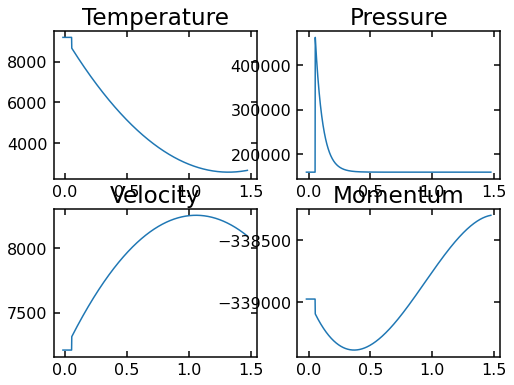

None


In [108]:
print(FuncSet1.multiplot())

In [98]:
while True:
    dataset_name = (str(input("Input dataset name:  or type q to quit the program ")))
    if dataset_name == "q":
        break
    else:
        continue
    altitude = int(input("Input altitude in km: "))
    obj_name = str(input("Input name of predictor object: "))
    print("Input option: ")
    print("Help - 1")
    print("Predict on your dataset - 2")
    choice = int(input("Input : "))
    obj_name = RegimeFunctionBuilder(dataset_name, altitude)
    obj_name.funcCaller()
    if choice == 1:

        #print(obj_name.PrintInfo())
        print(obj_name._help())

Input dataset name:  or type q to quit the program q


In [ ]:
root = tk.Tk()
#root = tk.Toplevel()
root.state('zoomed')
#root.iconbitmap('rocket_icon.ico')
root.title('SPAFF Model')
HEIGHT = 700
WIDTH = 1000
canvas = tk.Canvas(root, height=HEIGHT, width=WIDTH)
canvas.pack()

#background_image = tk.PhotoImage(file='cosmos-5809271_1920.png')
#image = Image.open("elmo-nuke.png")
#image= image.resize((34, 26), Image.ANTIALIAS)
#larger_image = image.zoom(2, 2)
background_image = tk.PhotoImage(file='gui_image.png',master=root)
background_label = tk.Label(root, image=background_image)
background_label.place(relwidth=1, relheight=1)

frame = tk.Frame(root, bg='#00688B', bd=5)
#frame = tk.Frame(root, bg='#80c1ff', bd=5)
frame.place(relx=0.5, rely=0.1, relwidth=0.75, relheight=0.4, anchor='n')

tk.Label(frame, text = "dataset: ").place(relwidth=0.3, relheight=0.1) 
tk.Label(frame, text = "altitude: ").place(relwidth = 0.3, relx=0.35, relheight=0.1) 
tk.Label(frame, text = "plot?").place(relx=0.7, relwidth=0.3, relheight=0.1)

# tk.Label(frame, text = "velocity:").place(relwidth=0.03, relheight=0.1, rely=0.15) 
# tk.Label(frame, text = "theta:").place(relx=0.21, relwidth=0.03, relheight=0.1, rely=0.15) 

# tk.Label(frame, text = 'Initial Velocity:').place(relwidth=0.03, relheight=0.1, rely=0.45)
# #tk.

entry_dataset_1 = tk.Entry(frame, font=40, text='dataset')
entry_dataset_1.place(relwidth=0.3, rely=0.2, relheight=0.1)

alt_var = tk.StringVar()

entry_altitude_1 = tk.Entry(frame, font=40,  textvariable=alt_var)
entry_altitude_1.place(relwidth=0.3, relx=0.35, rely=0.2, relheight=0.1)

# def handle_click(event):
#     print("!")

# check = tk.Checkbutton(root,
#                 text='Plot',
#                 command=obj_name.multiplot(),
#                 variable=agreement,
#                 onvalue=1,
#                 offvalue=0).pack()

button_initialise = tk.Button(frame, text="Initialise Class", font=40, command=lambda: RegimeFunctionBuilder(str(entry_dataset_1.get()), float(entry_altitude_1.get())))
button_initialise.place(relx=0.35, rely=0.5, relheight=0.1, relwidth=0.3)

button_predict = tk.Button(frame, text="Predict Flowfield", font=40, command=lambda: obj_name.Predictor())
button_predict.place(relx=0.35, rely=0.7, relheight=0.1, relwidth=0.3)

button_plot = tk.Button(frame, text="Plot?", font=40, command=lambda: obj_name.multiplot())
button_plot.place(relx=0.7, rely=0.5, relheight=0.1, relwidth=0.3)


# entry_planet_1 = tk.Entry(frame, font=40, text='Planet')
# entry_planet_1.place(relwidth=0.15, relx=0.45, rely=0, relheight=0.1)

# entry_vi = tk.Entry(frame, font=40, text='initial velocity')
# entry_vi.place(relwidth=0.15, relx=0.05, rely=0.15, relheight=0.1)

# entry_theta_1 = tk.Entry(frame, font=40)
# entry_theta_1.place(relwidth=0.15, rely=0.15, relx =0.25, relheight=0.1)

# entry_vi_2 = tk.Entry(frame, font=40)
# entry_vi_2.place(relwidth=0.15, rely=0.3, relx=0.05, relheight=0.1)

# entry_vf = tk.Entry(frame, font=40)
# entry_vf.place(relwidth=0.15, rely=0.3, relx=0.25, relheight=0.1)

# entry_theta = tk.Entry(frame, font=40)
# entry_theta.place(relwidth=0.15, rely=0.3, relx =0.45, relheight=0.1)

# entry_planet1 = tk.Entry(frame, font=40)
# entry_planet1.place(relwidth=0.15, rely=0.6, relx=0.05,relheight=0.1)

# entry_planet2 = tk.Entry(frame, font=40)
# entry_planet2.place(relwidth=0.15, rely=0.6, relx=0.25,relheight=0.1)

# entry_parking_orbit = tk.Entry(frame, font=40)
# entry_parking_orbit.place(relwidth=0.15, rely=0.6, relx=0.45, relheight=0.1)

# #button_hohmann_1 = tk.Button(frame, text="Hohmann Transfer Delta-V", font=40, command=lambda: deltaV_1(float(entry_r1_1.get()), float(entry_r2_1.get()),Earth))
# button_hohmann_1 = tk.Button(frame, text="Hohmann Transfer Delta-V", font=40, command=lambda: deltaV_1(float(entry_r1_1.get()), float(entry_r2_1.get()),entry_planet_1.get()))
# button_hohmann_1.place(relx=0.7, rely=0, relheight=0.1, relwidth=0.3)

# button_normrad = tk.Button(frame, text="Normal/Radial Delta-V", font=40, command=lambda: NormRad(float(entry_vi.get()), float(entry_theta_1.get())))
# button_normrad.place(relx=0.7, rely=0.15, relheight=0.1, relwidth=0.3)

# button_normrad_diffV = tk.Button(frame, text="Normal/Radial Delta-V (Different velocities)", font=40, command=lambda: NormRad_TwoVel(float(entry_vi_2.get()),float(entry_vf.get()),float(entry_theta.get())))
# button_normrad_diffV.place(relx=0.7, rely=0.3, relheight=0.1, relwidth=0.3)

# button_plot = tk.Button(frame, font=40, text='Plot Radial/Normal Maneuvre Delta-V', command=lambda: NormRadPlot(float(1000)))
# button_plot.place(relwidth=0.3, rely=0.45, relx=0.7, relheight=0.1)

# button_delta_V = tk.Button(frame, font=40, text='Hohmann transfer Delta-V', command=lambda: Delta_v(entry_planet1.get(),entry_planet2.get(),float(entry_parking_orbit.get())))
# button_delta_V.place(relwidth=0.3, rely=0.6, relx=0.7, relheight=0.1)

# lower_frame = tk.Frame(root, bg='#00688B', bd=10)
# lower_frame.place(relx=0.5, rely=0.65, relwidth=0.25, relheight=0.2, anchor='n')

# label = tk.Label(lower_frame)
# label.place(relwidth=1, relheight=1)


root.mainloop()